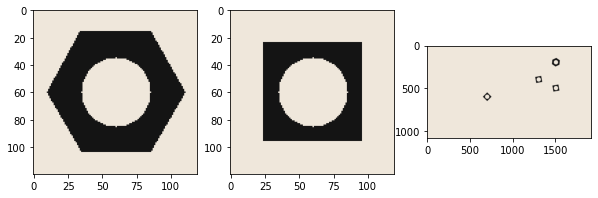

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3,figsize=(10, 10))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_BGR2RGB))
plt.show()

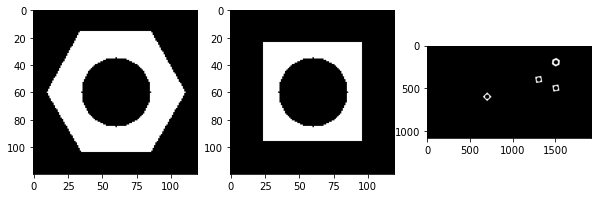

In [5]:
hexnut_template_ret, hexnut_template_thresh = cv.threshold(cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY), 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
squarenut_template_ret, squarenut_template_thresh = cv.threshold(cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY), 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
conveyor_f100_ret, conveyor_f100_thresh = cv.threshold(cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY), 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

fig, ax = plt.subplots(1, 3, figsize=(10, 10))
ax[0].imshow(hexnut_template_thresh, cmap='gray')
ax[1].imshow(squarenut_template_thresh, cmap='gray')
ax[2].imshow(conveyor_f100_thresh, cmap='gray')
plt.show()

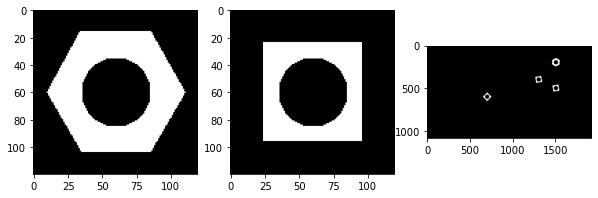

In [8]:
kernel = np.ones((3, 3), np.uint8)
hexnut_template_closed = cv.morphologyEx(hexnut_template_thresh, cv.MORPH_CLOSE, kernel)
squarenut_template_closed = cv.morphologyEx(squarenut_template_thresh, cv.MORPH_CLOSE, kernel)
conveyor_f100_closed = cv.morphologyEx(conveyor_f100_thresh, cv.MORPH_CLOSE, kernel)

fig, ax = plt.subplots(1, 3, figsize=(10, 10))
ax[0].imshow(hexnut_template_closed, cmap='gray')
ax[1].imshow(squarenut_template_closed, cmap='gray')
ax[2].imshow(conveyor_f100_closed, cmap='gray')
plt.show()

In [27]:
retval, labels, stats, centroids = cv.connectedComponentsWithStats(squarenut_template_closed)

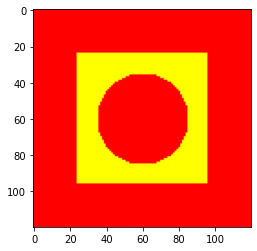

In [53]:
im = cv.applyColorMap((labels/np.amax(labels)*255).astype('uint8'), cv.COLORMAP_AUTUMN)
plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))